## **Laboratorio 10: Aplicaciones del método de Descenso de Gradiente y el método de Newton**

**Facultad de ingeniería**

Departamento de Ingeniería Biomédica

Universidad de los Andes

**IBIO-2340** Fundamentos de Machine Learning.

**Nombres de los integrantes**


1.   Laura Julieth Carretero Serran
2.   Juan David Rios Nisperuza

**Número del grupo**

*3*


# **1. Introducción al problema**

El centro de atención médica "Los Robles" es una institución de servicios de salud con más de 100 años de trayectoria que se encuentra ubicada en el centro del municipio de San Antonio. Sus empleados, tanto administrativos como personal médico, residen en zonas aledañas al pueblo. Debido al deterioro que ha tenido el edificio durante los 100 años de funcionamiento, el nuevo gerente busca reubicar el centro de salud en una zona que reduzca la distancia de desplazamiento de los empleados sin que se aleje demasiado de la posición actual. Para ello, ha contratado un equipo de ingenieros biomédicos de la Universidad de los Andes, quienes se encargarán de definir la mejor localización para el nuevo centro de salud.

Después de hacer un estudio, se determinaron las coordenadas de ubicación de la vivienda de los 20 empleados actuales así como las coordenadas de ubicación del actual centro de salud. Esta información se encuentra en el archivo ***localizaciones.csv***. Las primeras 20 coordenadas en el archivo corresponden a la localización de los empleados y la última es la ubicación actual del centro de salud.

Para solucionar el problema y hallar el punto óptimo para la localización del nuevo centro de salud, el gerente pide:

* Minimizar el cuadrado de la distancia euclidiana entre cada coordenada de los empleados y la localización del nuevo centro de salud

* Minimizar simultáneamente el cuadrado de la distancia euclidiana entre la nueva y la actual localización del centro de salud.

* Dar una prioridad de 15 a la minimización de la distancia de los empleados respecto a la minimización de la distancia de la actual ubicación.

No se dispone de restricción alguna respecto a la nueva ubicación del centro de salud. Para facilitar el análisis, sean $p^{(i)}=[p_1^{(i)},p_2^{(i)}]^T$ las coordenadas del $i$-ésimo empleado, $x=[x_1,x_2]^T$ las coordenadas de la nueva ubicación y $q=[q_1,q_2]^T$ las coordenadas de la actual ubicación.

# **2. Ejercicios**

In [15]:
import numpy as np
import sympy as sym
import pandas as pd
import matplotlib.pyplot as plt

**2.1.** Defina el problema de optimización asociado a los requerimientos de la gerencia del centro de salud.

In [16]:
# Carga el archivo CSV con las localizaciones
DataFrame = pd.read_csv("localizaciones.csv")

# Extrae las coordenadas x1 y x2 de los empleados (excepto la última fila)
p1 = np.array(DataFrame["x1"])[0:-1]
p2 = np.array(DataFrame["x2"])[0:-1]

# Extrae las coordenadas del centro médico (última fila, índice 20)
q1, q2 = np.array(DataFrame["x1"][20]), np.array(DataFrame["x2"][20])

# Define las variables simbólicas x1 y x2
x1, x2 = sym.symbols("x_1,x_2", real=True)

# Define la función objetivo: distancia desde el punto actual al centro médico
f = sym.sqrt((q1 - x1)**2 + (q2 - x2)**2)

# Suma la distancia ponderada a cada uno de los empleados
for i in range(20):
    f += 15 * sym.sqrt((p1[i] - x1)**2 + (p2[i] - x2)**2)

# Convierte la función simbólica a una función numérica evaluable
f_num = sym.lambdify([x1, x2], f)

**2.2.** Implemente el método de Descenso de Gradiente para encontrar la ubicación óptima del nuevo centro de salud. Para ello, utilice al menos tres valores diferentes para la tasa de aprendizaje $\alpha$. Además defina la tolerancia, el criterio de parada y el número máximo de pasos del algoritmo. Justifique su elección.

In [17]:
def gradient(p):
    """
    Calcula el gradiente de la función f en un punto dado.
    """
    df_dx1 = sym.diff(f,x1)
    df_dx2 = sym.diff(f,x2)

    df_dx1_num = sym.lambdify([x1,x2],df_dx1)
    df_dx2_num = sym.lambdify([x1,x2],df_dx2)

    return np.array([df_dx1_num(p[0],p[1]), df_dx2_num(p[0],p[1])])
                     

def gradient_descent1(x0, alpha, N, epsilon):
    """
    Implementa el algoritmo de Descenso de Gradiente con un criterio de parada basado en la tolerancia ε.
    
    Parámetros:
    - x0: Punto inicial.
    - alpha: Tasa de aprendizaje (paso del descenso).
    - N: Número máximo de iteraciones.
    - epsilon: Tolerancia para la convergencia.

    Retorna:
    - history_x: Historial de puntos visitados por el algoritmo.
    - history_f: Valores de la función evaluada en cada punto.
    - x0_min: Punto donde se alcanza el mínimo estimado.
    - stop: Indica si el número máximo de iteraciones fue superado (True) o no (False).
    """
    history_x = []
    history_f = []

    stop = True
    
    for i in range(N):
        x0_old = x0.copy()
        x0 = x0_old - alpha * gradient(x0_old)

        history_x.append(list(x0))
        history_f.append(f_num(x0[0], x0[1]))

        if np.linalg.norm(x0 - x0_old) <= epsilon:
            stop = False
            break

    x0_min = x0
    
    history_x = np.array(history_x)
    history_f = np.array(history_f)

    return history_x, history_f, x0_min, stop

In [18]:
history_xg1, history_fg1, x0_ming1, stop1 = gradient_descent1([q1,q2], 0.05, 1000, 0.001)
history_xg1, history_fg1, x0_ming1, stop1

(array([[69.7424851 , 98.1986004 ],
        [61.0978227 , 86.11165153],
        [52.47228878, 74.0617227 ],
        ...,
        [17.50412125, 25.56235093],
        [18.29332558, 25.78190342],
        [17.50412125, 25.56235093]]),
 array([27577.53793695, 23166.59552295, 18784.78222642, 14460.75453437,
        10278.26066876,  6600.66325451,  4551.2843185 ,  4230.64666913,
         4204.50509261,  4201.89788119,  4202.71482384,  4205.44488318,
         4206.34472701,  4205.45731699,  4205.53274961,  4205.32515463,
         4205.64887079,  4205.38242442,  4205.62997698,  4205.36419138,
         4205.63332011,  4205.36946418,  4205.63267622,  4205.36800245,
         4205.63281332,  4205.36839937,  4205.63278177,  4205.36829271,
         4205.63278946,  4205.36832121,  4205.63278752,  4205.36831362,
         4205.63278802,  4205.36831564,  4205.63278789,  4205.3683151 ,
         4205.63278792,  4205.36831524,  4205.63278791,  4205.36831521,
         4205.63278792,  4205.36831522,  4205.632

In [19]:
history_xg2, history_fg2, x0_ming2, stop2 = gradient_descent1([q1,q2], 0.025, 1000, 0.001)
history_xg2, history_fg2, x0_ming2, stop2

(array([[ 74.10109318, 104.26258573],
        [ 69.77437622,  98.21382221],
        [ 65.45087004,  92.17115166],
        ...,
        [ 17.76149683,  25.85549726],
        [ 17.8797957 ,  25.8983111 ],
        [ 17.76149683,  25.85549726]]),
 array([29798.07976057, 27586.73190775, 25379.72341058, 23178.36806626,
        20984.56881627, 18801.18769228, 16632.73040163, 14486.69892894,
        12376.47681641, 10328.06587976,  8397.87102052,  6720.61940627,
         5506.56679889,  4756.64199877,  4324.28249206,  4219.38331592,
         4201.90032946,  4201.54619927,  4201.41021613,  4201.35792986,
         4201.33805279,  4201.33054243,  4201.32773554,  4201.32672066,
         4201.32641961,  4201.32646135,  4201.32678021,  4201.32749271,
         4201.32892426,  4201.33172414,  4201.33715659,  4201.34738845,
         4201.3660788 ,  4201.3971459 ,  4201.44327004,  4201.49546498,
         4201.53965299,  4201.55409862,  4201.54847584,  4201.5267461 ,
         4201.5096518 ,  4201.4941459

In [20]:
history_xg3, history_fg3, x0_ming3, stop3 = gradient_descent1([q1,q2], 0.01, 1000, 0.001)
history_xg3, history_fg3, x0_ming3, stop3

(array([[ 76.71625804, 107.90097692],
        [ 74.98467856, 105.48044668],
        [ 73.25350906, 103.06070211],
        [ 71.5227967 , 100.64181527],
        [ 69.79258923,  98.22387214],
        [ 68.06293971,  95.80697171],
        [ 66.33390823,  93.39122781],
        [ 64.60556346,  90.97677172],
        [ 62.87798424,  88.56375563],
        [ 61.15126166,  86.15235689],
        [ 59.42550141,  83.7427835 ],
        [ 57.7008268 ,  81.33528095],
        [ 55.97738245,  78.93014118],
        [ 54.25533888,  76.52771407],
        [ 52.53489831,  74.12842265],
        [ 50.8163019 ,  71.73278326],
        [ 49.09983889,  69.34143269],
        [ 47.38585817,  66.95516547],
        [ 45.6747827 ,  64.57498536],
        [ 43.96712768,  62.2021783 ],
        [ 42.26352284,  59.83841684],
        [ 40.56473957,  57.48591282],
        [ 38.87172349,  55.14764403],
        [ 37.18563424,  52.82769669],
        [ 35.50790266,  50.53178995],
        [ 33.84034718,  48.26808579],
        [ 32

**2.3.** Grafique la trayectoria de la solución seguida por el algoritmo según los parámetros dados (es decir, cómo cambia la ubicación del puesto de salud en cada paso del algoritmo) para el método de Descenso de Gradiente. En esta gráfica incluya las 20 coordenadas de ubicación de los empleados asi como la posición del puesto de salud actual.

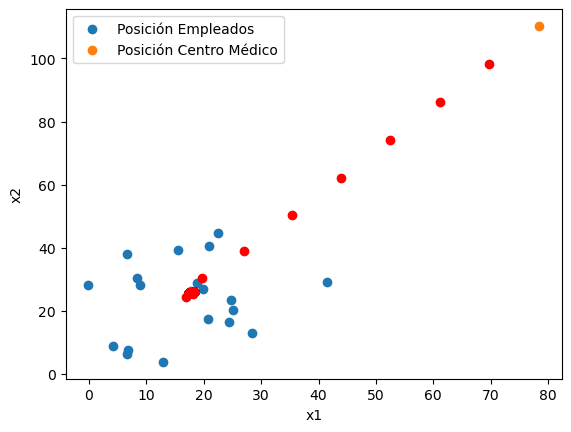

In [21]:
# Dibuja la posición de los empleados en el plano
plt.scatter(p1, p2, label="Posición Empleados")

# Dibuja la posición del centro médico en el plano
plt.scatter(q1, q2, label="Posición Centro Médico")

# Dibuja los puntos de la trayectoria generada
for i in history_xg1:
    plt.scatter(i[0], i[1], color="red")

# Etiqueta del eje x
plt.xlabel("x1")

# Etiqueta del eje y
plt.ylabel("x2")

# Muestra la leyenda del gráfico
plt.legend()


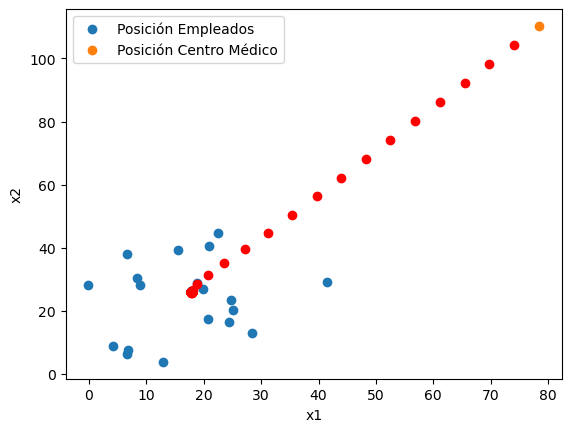

In [22]:
# Dibuja la posición de los empleados en el plano
plt.scatter(p1, p2, label="Posición Empleados")

# Dibuja la posición del centro médico en el plano
plt.scatter(q1, q2, label="Posición Centro Médico")

# Dibuja los puntos de la trayectoria generada
for i in history_xg2:
    plt.scatter(i[0], i[1], color="red")

# Etiqueta del eje x
plt.xlabel("x1")

# Etiqueta del eje y
plt.ylabel("x2")

# Muestra la leyenda del gráfico
plt.legend()


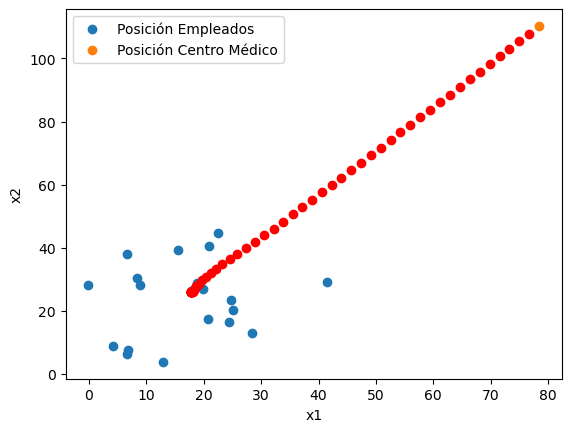

In [23]:
# Dibuja la posición de los empleados en el plano
plt.scatter(p1, p2, label="Posición Empleados")

# Dibuja la posición del centro médico en el plano
plt.scatter(q1, q2, label="Posición Centro Médico")

# Dibuja los puntos de la trayectoria generada 
for i in history_xg3:
    plt.scatter(i[0], i[1], color="red")

# Etiqueta para el eje x
plt.xlabel("x1")

# Etiqueta para el eje y
plt.ylabel("x2")

# Muestra la leyenda del gráfico
plt.legend()

**2.4.** Implemente el método de Newton para hallar la ubicación óptima del nuevo centro de salud. Además defina la tolerancia, el criterio de parada y el número máximo de pasos del algoritmo.

In [24]:
grad_f = [sym.diff(f, x1), sym.diff(f, x2)]
H_f = sym.hessian(f, (x1, x2))

grad_f_num = sym.lambdify([x1, x2], grad_f, modules="numpy")
H_f_num = sym.lambdify([x1, x2], H_f, modules="numpy")

In [25]:
def newton_method(x0, tol=1e-5, max_iter=100):
    """
    Implementa el método de Newton para encontrar un mínimo de una función multivariable.

    Parámetros:
        x0 (array-like): Punto inicial.
        tol (float): Tolerancia para el criterio de convergencia basada en la norma del gradiente.
        max_iter (int): Número máximo de iteraciones permitidas.

    Retorna:
        x (ndarray): Punto estimado del mínimo.
        trajectory (list): Lista de puntos visitados durante la iteración.
    """


    x = np.array(x0, dtype=float)
    trajectory = [x.copy()]
    
    for i in range(max_iter):
        grad = np.array(grad_f_num(*x), dtype=float)
        H = np.array(H_f_num(*x), dtype=float)

        if np.linalg.norm(grad) < tol:
            print(f"Convergencia alcanzada en {i} iteraciones.")
            return x, trajectory

        try:
            delta = np.linalg.inv(H)@grad
        except np.linalg.LinAlgError:
            print("Error: Hessiano no invertible.")
            return None, trajectory

        x = x - delta
        trajectory.append(x.copy())

    print("Número máximo de iteraciones alcanzado.")
    return x, trajectory

In [26]:
xn, trajectoryn = newton_method(np.array([30,30]), tol=1e-10, max_iter=1000)

xn, trajectoryn

Número máximo de iteraciones alcanzado.


(array([18.48811579, 26.16722964]),
 [array([30., 30.]),
  array([-0.65329087, 15.24833872]),
  array([28.66227702, 26.81682501]),
  array([ 4.29224057, 17.42837947]),
  array([21.64673375, 31.20703222]),
  array([13.5551272 , 16.68776638]),
  array([22.4517859 , 29.81183255]),
  array([13.34536106, 20.23848025]),
  array([19.90615326, 27.17826481]),
  array([18.25042641, 23.13819719]),
  array([17.70120586, 26.3686297 ]),
  array([18.07695039, 24.13396266]),
  array([17.81574232, 26.22896238]),
  array([17.04177744, 24.44053876]),
  array([18.31341243, 26.11569952]),
  array([17.19473188, 25.62519688]),
  array([18.60240589, 26.17357469]),
  array([17.24007181, 25.47192694]),
  array([18.41483002, 26.16715454]),
  array([17.17362063, 25.52812627]),
  array([18.53806962, 26.16327278]),
  array([17.22323515, 25.4986455 ]),
  array([18.4532072 , 26.16938443]),
  array([17.18621092, 25.51568571]),
  array([18.5122985 , 26.16505384]),
  array([17.21211818, 25.50422102]),
  array([18.471142

**2.5.** Grafique la trayectoria del algoritmo según los parámetros dados para el método de Newton. En esta gráfica incluya las 20 coordenadas de ubicación de los empleados asi como la posición del puesto de salud actual.




No podemos graficar la trayectoria desde el punto inicial de la posición del puesto de salud actual porque el algortimo diverge. Lo mismo pasa con otros rangos de puntos iniciales. Además, se queda en un mínimo local si el punto inicial es 10,10.

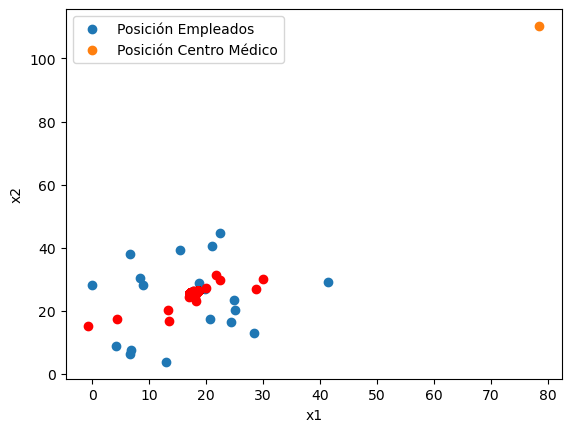

In [27]:
# Dibuja la posición de los empleados en el plano
plt.scatter(p1, p2, label="Posición Empleados")

# Dibuja la posición del centro médico
plt.scatter(q1, q2, label="Posición Centro Médico")

# Dibuja la trayectoria seguida por el método de Newton en color rojo
for i in trajectoryn:
    plt.scatter(i[0], i[1], color="red")

# Etiqueta del eje x
plt.xlabel("x1")

# Etiqueta del eje y
plt.ylabel("x2")

# Muestra la leyenda del gráfico
plt.legend()

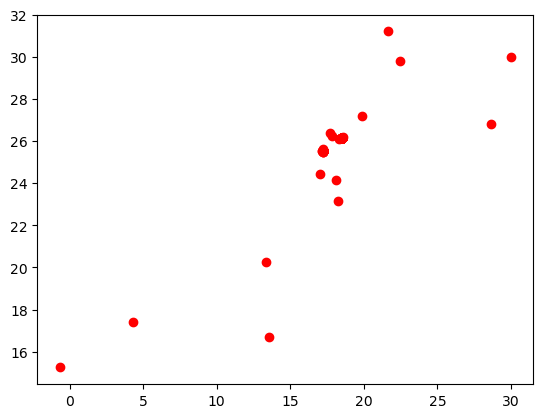

In [28]:
# Dibuja cada punto de la trayectoria en rojo
for i in trajectoryn:
    plt.scatter(i[0], i[1], color="red")


**2.6.** Analice los resultados obtenidos con cada método: ¿Cúal de los dos algoritmos converje mejor, por qué?, ¿cúal de los resultados obtenidos es el mejor, por qué? ¿De qué forma afecta la solución obtenida la inclusión del factor de prioridad en alguno de los dos términos de la función objetivo?

El algoritmo de gradiente descendente converge mejor en este caso porque presenta un descenso más estable y alcanza una solución final de mayor calidad, siendo menos susceptible a problemas como una mala estimación de la matriz Hessiana que pueden afectar al método de Newton, el cual además es más propenso a caer en mínimos locales. El mejor resultado también se obtiene con gradiente descendente, ya que obtiene una solución más precisa y sin la redundancia observada en las coordenadas repetidas del método de Newton. Por ultimo, al incorporar un factor de prioridad en la función objetivo, el algoritmo favorece ubicaciones que atienden mejor a los puntos de mayor importancia, cambiando el equilibrio de la solución para no solo minimizar la distancia total, sino también priorizar estratégicamente ciertos nodos.

**2.7.** Presente los resultados a las directivas del centro de salud junto con la conclusión de su estudio. Para ello apóyese en gráficas lo suficientemente claras y bien presentadas, con una selección de colores y notación que facilite el entendimiento de las directivas del centro de salud.

En las gráficas presentadas a continuación:

Los puntos azules representan la ubicación de cada empleado.

El punto naranja representa la ubicación actual del centro médico.

Los puntos rojos muestran la trayectoria que siguió el sistema para encontrar una mejor ubicación.

El último punto rojo corresponde a la propuesta de ubicación final del nuevo centro médico.

### Resultados
A través de este análisis, se encontró una ubicación óptima que reduce el tiempo de desplazamiento promedio de los empleados y se encuentra en una posición central con respecto a sus viviendas. Esta nueva ubicación también evita zonas con aglomeraciones innecesarias o alejadas, lo que mejora la eficiencia y accesibilidad del nuevo centro.

Además, esta solución fue comparada usando dos métodos diferentes. En el cual mostramos el mas efectivo, ya que mostró un avance más estable y una solución final más precisa.

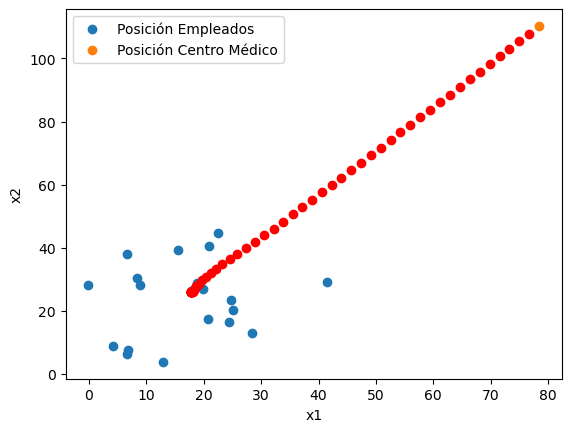

In [29]:
# Dibuja la posición de los empleados en el plano
plt.scatter(p1, p2, label="Posición Empleados")

# Dibuja la posición del centro médico en el plano
plt.scatter(q1, q2, label="Posición Centro Médico")

# Dibuja los puntos de la trayectoria generada 
for i in history_xg3:
    plt.scatter(i[0], i[1], color="red")

# Etiqueta para el eje x
plt.xlabel("x1")

# Etiqueta para el eje y
plt.ylabel("x2")

# Muestra la leyenda del gráfico
plt.legend()